In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
from sklearn import ensemble
#from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import cross_validation

In [18]:
train = pd.read_csv('train_20min.csv',header=0)

In [20]:
train.drop('sgtime',axis=1, inplace= True)

In [21]:
train.head()

,bldid,PROBING,UNKNOWN,mac,ASSOCIATED,interv,hr,mins,wks,SDE1-02,SDE1-03,SDE1-04,SDE1-05,SDE2-01,SDE2-02,SDE2-03,SDE3-01,SDE3-02,SDE3-03,SDE3-04
0,SDE1-02,1.0,0.0,1,0.0,20.0,0,0,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,SDE1-02,1.0,0.0,1,0.0,0.0,2,40,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SDE1-02,1.0,0.0,1,0.0,0.0,2,45,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SDE1-02,1.0,0.0,1,0.0,0.0,7,50,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SDE1-02,1.0,0.0,1,0.0,0.0,7,55,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
sde = pd.read_csv('tr_20min.csv',header=0)

In [17]:
sde.head()

,bldid,sgtime,PROBING,UNKNOWN,mac,ASSOCIATED,interv,hr,mins,wks
0,SDE1-02,2016-04-16 00:00:01,1.0,0.0,1,0.0,20.0,0,0,6
1,SDE1-02,2016-04-16 02:40:01,1.0,0.0,1,0.0,0.0,2,40,6
2,SDE1-02,2016-04-16 02:45:01,1.0,0.0,1,0.0,0.0,2,45,6
3,SDE1-02,2016-04-16 07:50:01,1.0,0.0,1,0.0,0.0,7,50,6
4,SDE1-02,2016-04-16 07:55:01,1.0,0.0,1,0.0,0.0,7,55,6


In [2]:
boston = datasets.load_boston()
X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [7]:
print X_train.shape
print y_train.shape

(455, 13)
(455,)


In [9]:
print boston.data.shape

(506, 13)


In [10]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 1,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 6.6196


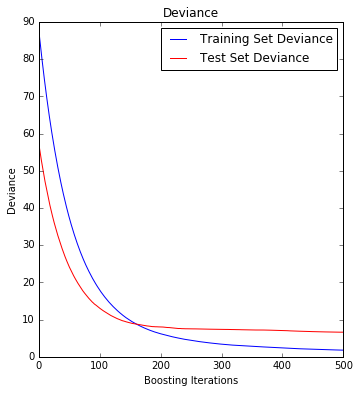

In [11]:
%matplotlib inline
## Training deviance plot
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

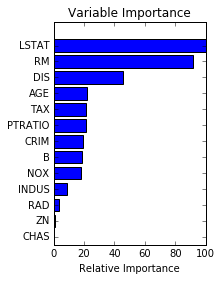

In [12]:
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### test for generating fields

In [1]:
from datetime import datetime, timedelta
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import sqlite3
from sqlalchemy import create_engine 

disk_engine = create_engine('sqlite:////Users/AAA218/Desktop/amifull_sg/new.sqlite')
conn = sqlite3.connect('new.sqlite')
cur = conn.cursor()

In [40]:
testf = pd.read_sql_query('SELECT mac, bldid, xcor, ycor ,lastlocatedtime,firstlocatedtime,sgtime,status,out FROM wifi ORDER BY lastlocatedtime ASC',disk_engine)

In [23]:
testf = DataFrame({'mac':["ma","tec","sa","tec","ma"],'bld':["b1","b2","b3","b4","b1"],'xcor':[200,300,30,40,300],"ycor":[100,200,30,50,400],"lastlocatedtime":["2016-04-16 00:00:01","2016-04-16 02:40:01","2016-04-16 07:50:01","2016-04-16 01:35:02","2016-04-16 09:40:01"]},columns=["mac", "bld","xcor", "ycor" ,"lastlocatedtime" ])

In [41]:
us_dict = dict()
interv = list()
mov = list()
distance = list()
testf.head()

,mac,bldid,xcor,ycor,lastlocatedtime,firstlocatedtime,sgtime,status,out
0,68:3e:34:07:7f:b4,SDE3-02,1377.65,708.20,2016-04-15 21:12:28,2016-04-15 15:46:18,2016-04-16 00:00:01,PROBING,0
1,f4:f2:6d:17:cc:6c,SDE3-03,876.84,426.49,2016-04-15 21:20:45,2016-04-15 17:19:40,2016-04-16 00:00:01,ASSOCIATED,0
2,f4:f2:6d:17:2a:26,SDE1-04,810.42,653.53,2016-04-15 21:22:26,2016-04-15 14:43:59,2016-04-16 00:00:01,ASSOCIATED,0
3,f4:f2:6d:11:00:c3,SDE3-01,995.23,406.91,2016-04-15 21:22:26,2016-04-15 17:49:15,2016-04-16 00:00:01,ASSOCIATED,0
4,f4:f2:6d:17:28:dd,SDE1-03,204.33,23.17,2016-04-15 21:25:45,2016-04-15 21:25:45,2016-04-16 00:00:01,ASSOCIATED,0


In [43]:
P1 = datetime.now()
testf["lastlocatedtime"] = pd.to_datetime(testf["lastlocatedtime"])
#print testf
for i , row in enumerate(testf.values):
    #update the last row id of device
    if (us_dict.get(row[0]) == None):
        us_dict[row[0]] = testf.index[0] + i 
        interv.append(0)
        mov.append('first')
        distance.append(float('NaN'))
        #print mov,"\ndistance:\n",distance
        continue
    else:
        # For the mac with prev record, first store and update the record
        prev_ind = us_dict.get(row[0])
        us_dict[row[0]] = i 
        prev_bld = testf.iloc[prev_ind,1]
        prev_t = testf.iloc[prev_ind,4]
        prev_x = testf.iloc[prev_ind,2]
        prev_y = testf.iloc[prev_ind,3]
        dif = timedelta.total_seconds(row[4] - prev_t)
        #print prev_ind,prev_t,prev_x,prev_y,prev_bld
        interv.append(dif)
        #print interv
        if (prev_bld != row[1]): 
            mov.append(prev_bld)
            distance.append(float('NaN'))
        else:
            dista = round(np.sqrt((prev_x-row[2])**2 + (prev_y-row[3])**2),2)
            distance.append(dista)
            if ((dista <= 1800)&(dif <= 3600)): #not moving exceeding 30*30 feet and disappear 1 hrs
                mov.append('stay')
            else:
                mov.append('left')
P2 = datetime.now()-P1

In [46]:
timedelta.total_seconds(P2)/60 #1 hr

57.63990811666667

In [50]:
wifnew = DataFrame({"interval":interv,"movement":mov,"distance":distance})

In [58]:
wifnew.movement.value_counts()

stay       2410104
first        56918
SDE1-03      30276
SDE3-02      28982
SDE3-04      24158
SDE3-03      19103
SDE1-04      18930
left         17870
SDE2-02      15548
SDE3-01      12269
SDE2-03       8070
SDE2-01       5620
SDE1-05       1731
SDE1-02        974
Name: movement, dtype: int64

In [30]:
#print "mov:\n",mov[0:10],"\ndict:\n",us_dict[0:15],"distance:\n",distance[-10:],"\ninterv:\n",interv[-5:]
testf["interval"] = interv
testf["movement"] = mov
testf["distance"] = distance


In [31]:
interv

[0, 0, 0, -3899.0, 34800.0]

In [59]:
print wifnew.tail()

         distance  interval movement
2650548      0.67     342.0     stay
2650549      1.96     303.0     stay
2650550      9.46     337.0     stay
2650551     16.56     309.0     stay
2650552       NaN   46555.0  SDE3-02


In [19]:
us_dict["f4:8b:32:fa:20:06"]

3272

In [67]:
All = pd.concat([testf,wifnew],axis=1)

In [68]:
All.to_sql(name='newwifi',index=False,con=conn,if_exists='replace',dtype={ "mac": "CHAR(20)","bldid": "CHAR(20)"," xcor ":"NUMERIC","ycor":" NUMERIC","lastlocatedtime":"DATETIME","firstlocatedtime":" DATETIME", "sgtime": "DATETIME", "status":"CHAR(20)","out": "INTEGER","interval": "INTEGER","movement": "CHAR(20)","distance":"NUMERIC"})

In [69]:
testf.shape[0]

2650553